# №1 (Вариант 4)


Вычислить х* на интервале [-5;5] при точности ε=0,01 
* методом половинного деления, 
* методом касательных и 
* методом простых итераций, 
* сравнить получившиеся значения; 
* построить график функции f(x). 
* Использовать решатели Python

Вариант 4 

$у= x^3+4.264*x^2–4.835*x–13.336$

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [1]:
def func(x):
    return x**3 + 4.264*x**2 - 4.835 * x - 13.336

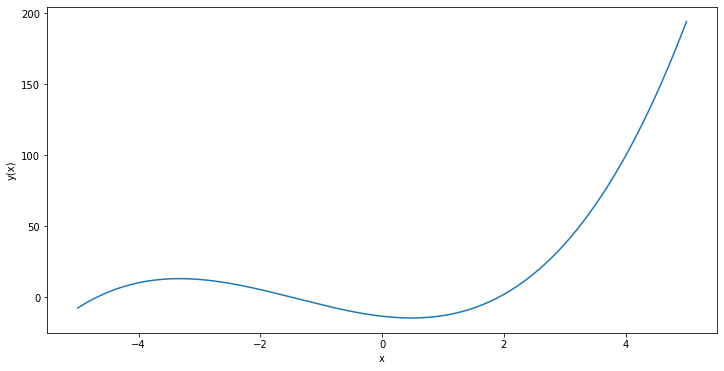

In [6]:
x = np.linspace(-5, 5, 1000)
y = func(x)
plt.figure(figsize = (12,6))
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y(x)')
plt.show()

## Метод половинного деления

In [53]:
def bisect(f, a, b, eps = 0.01):
    while True:
        c = (a+b)/2
        if f(c)*f(a) < 0:
            b = c
        else:
            a = c
        if abs(f(c)) < eps:
            return c, f(c) 

In [54]:
bisect(func, -5, 5, 0.01)

(1.9122314453125, 0.002548595908288931)

## Метод касательных

Введем производную:

In [32]:
def f_der(x):
    return 3* x**2 + 2* 4.264*x - 4.835 

In [33]:
def newton(f, f_der, x, eps = 0.01):
    while True: 
        x = x - f(x) / f_der(x)
        if abs(f(x)) < eps:
            return x, f(x)

In [34]:
newton(func, f_der, 0.)

(-1.4872092696200387, -0.003661292000684213)

## Метод простых итераций

In [35]:
def fixiter(f, f_der, x, eps = 0.01):
    while True:
        l = 1/f_der(x)
        x = x - l* f(x)
        if abs(f(x)) < eps:
            return x, f(x)

In [36]:
fixiter(func, f_der, 0.)

(-1.487209269620039, -0.003661292000684213)

In [55]:
from scipy.optimize import root

In [64]:
root(func, 3)

    fjac: array([[-1.]])
     fun: array([1.59872116e-14])
 message: 'The solution converged.'
    nfev: 9
     qtf: array([-1.25331958e-08])
       r: array([-22.44015106])
  status: 1
 success: True
       x: array([1.91211788])

## Вывод

root нашел только один корень из 3х, он совпал с ответом первого метода. Остальные методы нашли другой корень (при других начальных условиях могли и к первому прийти). Методы достаточно точны и быстры, но сходятся только к одному ответу - это их минус